<a id='Top'></a>
# CLASSIFICATION CHALLENGE

© Explore Data Science Academy

---


###   Predict Overview: Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

---


<a id="cont"></a>

## Table of Contents

<a href=#one>1. INTRODUCTION</a>
* <a href=#oneq>[Problem Statement](#problemstament)
* [Project Objectives](#po)
* [Definition of Data Features](#dotrain_eda)
* [Starting a Comet experiment](#StartingaCometexperiment)

<a href=#two>2. Import necessary libraries</a>

<a href=#three>3. Loading Datasets</a>

<a href=#four>4. Data Preprocessing (Cleaning)</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#seven>6. Data or feature Engineering</a>
* [TF-IDF](#tfidf)
* [WORD2VEC](word2vec)

<a href=#six>6. Classification Model</a>



<a href=#seven>7. Pipelines</a>
  * [Building Classification Pipelines](#classifiers)
  * [Using Word2Vec](#pipe_word2vec)

<a href=#seven>7. Modelling and Evaluation</a>
  * [Modelling - Raw tweets](#raw_tweets)
  * [Modelling - Cleaned tweets](#clean_tweets)
  * [Model perfomance (raw tweets vs cleaned tweets)](#rvc)
  * [Model perfomance (tfidf vs word2vec)](tfidfvsword2vec)

  
<a href=#Eight>8. Ensemble Method</a>

<a href=#Nine>9. Selecting the best model</a>

<a href=#Ten>10. Predictions</a>

<a href=#Eleven>11. Submission</a>

<a href=#Twelve>12. conclusion</a>

<a href=#Thirteen>13. appendix</a>

<a href=#Fourteen>14. references</a>



    
    


 <a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: INTRODUCTION ⚡ |
| :--------------------------- |
| We will address the problem statement and objectives, as well as the classification of data aspects and a brief discussion of the Climate Change Belief Analysis in this part.|

Companies are built with the goal of reducing one's environmental effect or carbon footprint. They provide ecologically friendly and sustainable goods and services that are in alignment with their principles and goals. They want to know how people feel about climate change and if they believe it is a serious threat.

 <a id="problemstament"></a> 
### 1.1 Problem Statement.

Create a Natural Language Processing model based on a particular twitter data to classify whether or not a person believes in climate change.

### 1.2 Project Objectives

* Clean the dataset so that it may be utilized for model development.

* Create a variety of models to identify whether or not someone believes in climate change.

* Using the provided Test Data, assess the model's accuracy in making predictions.

* Pick the best model for determining whether or not someone believes in climate change.

* Advise companies on the best strategy to determine if people believe in climate change and whether it is a serious concern.

### 1.3 Definition of Data Features

Chris Bauch of the University of Waterloo received a Canada Foundation for Innovation JELF Grant to acquire these data. The collection includes tweets about climate change that were gathered between April 27, 2015 and February 21, 2018. There were 43943 tweets in total. Each tweet is assigned to one of the classes below:

#### I. Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

#### II. Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

### 1.4 Starting a Comet experiment
<img src="https://www.comet.ml/images/logo_comet_light.png" width="350" alt="Drawing" style="width: 350px;"/>

We will be using Comet as a form of version control throughout the development of our model

In [71]:
# from comet_ml import Experiment

In [72]:
# # Creating an experiment with your api key
# experiment = Experiment(
#     api_key="bEFY9Hn1QccermEDT6aTyQMOA",
#     project_name="siders-analytics-zf5",
#     workspace="kojosbk",
# )

 <a id="two"></a>
## 2. Import necessary libraries
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Import necessary libraries ⚡ |
| :--------------------------- |
| We'd be importing all of the necessary libraries for the notebook to run smoothly..|



In [73]:
# imports for data visualisation

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px
import plotly.graph_objects as go

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

# imports model prosessing
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

# imports Checking Acuracy
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_roc_curve

# imports for other libraires
import pickle
import unicodedata
import warnings
warnings.filterwarnings("ignore")
import en_core_web_sm
import spacy

#Imbalanced data processing packages
from imblearn.over_sampling import SMOTE


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




<a id="Three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| The data from the `train` file is loaded into a DataFrame in this section.. |

---

To start importing our data, make sure the raw data and notebook file are both in the same folder on our local system. Using the code below, we'll load the train data sets into our notebook. If the files aren't in the same folder, we'll have to point to the directory on our machine . To check that the data has loaded correctly, it is a good practice to call up the loaded data after it has been loaded.
The information would be saved in two different data frames, one for training and testing and the other for our EDA.

In [74]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

# EDA Datasets
train_eda = pd.read_csv('train.csv')
test_eda = pd.read_csv('test_with_no_labels.csv')
train_eda.head()

#for Demonstration
train_dem = pd.read_csv('train.csv')
test_dem = pd.read_csv('test_with_no_labels.csv')

#### 2.1 Set Pandas to enable viewing of all columns
Due to the length of th content of the message column, pandas cannot display all of them at once by default. While doing EDA and data cleansing, we will need to see all of the columns. When the dataframe is presented, the code below allows us to see the whole set of columns in our data collection. 

In [75]:
# Set option to display all columns
pd.set_option('display.max_colwidth', None)

#### 2.2 Check the "Shape" of the data-sets
As demonstrated by the shape of both datasets, the data has been separated into two sets. The form also shows that the training data set has three columns, but the test data set has just two. Our model is designed to forecast the column that is not present in the test set. We can look for that specific item by looking for the missing entity (Column) in the test data set. After looking at both datasets, the column may be identified as the sentiment column.

In [76]:
train_eda.shape, test_eda.shape

((15819, 3), (10546, 2))

#### 2.2.1 Use the ".column" function to view the columns in our data set;
The number of columns and rows in our data set were revealed by the shape method, but the.columns function provides the names of all the columns in the dataframe.

In [77]:
train_eda.columns, test_eda.columns

(Index(['sentiment', 'message', 'tweetid'], dtype='object'),
 Index(['message', 'tweetid'], dtype='object'))

<a id="four"></a>
## 4. Data Preprocessing (Cleaning)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this phase, we'll convert the data into a readable and desired format, as well as filter out the most relevant information.. |
# 

#### 3.1 Identifying Missing Values

It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean as this function shows that only the column "Valencia_pressure" features null values.

In [78]:
#making a copy of the dataframe
train_data = train.copy()
test_data = test.copy()

#Cheching if there are missing values in the Train dataset
train.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [79]:
#Cheching if there are missing values in the Test dataset
test.isna().sum()

message    0
tweetid    0
dtype: int64

#### 3.2 Removing Mentions

After the @ symbol, the code extracts all characters (a-z for lower letters, A-Z for capital letters, 0-9 for any number, and an underscore because Twitter supports underscores in usernames). Then it will come to a halt if it encounters any character other than those listed in the brackets, such as a whitespace.

In [80]:
train_dem['message'] = train_dem['message'].str.replace('@[A-Za-z0-9]+\s?', '', regex=True)
train_dem.head()


,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 3.3 Removing Hashtags

After the # sign, the code extracts all characters (a-z for lower letters, A-Z for capital letters, 0-9 for any number, and an underscore because Twitter supports underscores in usernames). Then it will come to a halt if it encounters any character other than those listed in the brackets, such as a whitespace.

In [81]:
train_dem['message'] = train_dem['message'].str.replace('#[A-Za-z0-9]+\s?', '', regex=True)
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 3.4 Removing accented characters
 
Accented characters/letters are common in text corpora, especially if you are simply interested in studying the English language. As a result, we must ensure that these characters are transformed to ASCII characters and standardized. Converting é to e is a simple example.

In [82]:
train_dem['message'] = train_dem['message'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
train.tail()

,sentiment,message,tweetid
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ,806319


#### 3.5 Removing HTML tags
 
Unstructured text frequently contains a lot of noise. HTML tags are a good example of a component that doesn't offer much to the interpretation and analysis of content.

In [83]:
train_dem['message'] = train_dem['message'].str.replace(r'<[^<>]*>', '', regex=True)
train.tail()

,sentiment,message,tweetid
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ,806319


#### 3.6 Panding Contractions
 
Words or syllables are abbreviated in contractions. In the English language, they are frequently found in both written and spoken form. By deleting key letters and sounds, these shorter versions or contractions of words are generated. In the case of English contractions, one of the vowels is frequently removed from the word. "Do not" becomes "don't," while "I would" becomes "I'd." Text standardization is aided by converting each contraction to its enlarged, original form.


In [84]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase



In [85]:
train_dem['message'] = train_dem['message'].apply(decontracted)
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 3.7 Removing URLs

There is often a lot of noise in unstructured text. URL tags are an example of a component that doesn't provide much in the way of content interpretation and analysis.

In [86]:
train_dem['message'] = train_dem['message'].str.replace('http\S+|www.\S+', '', case=False)
train_dem['message'] = train_dem['message'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()

train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 3.8 Removing Punctuations

In textual data, there is generally a lot of noise. Punctuations are an example of a component that offers nothing in the way of textual analysis and interpretation. Performing this operation aids in text uniformity.


In [87]:
def remove_punc(x):
  x = re.sub(r"([^A-Za-z0-9]+)"," ",x)
  return x

train_dem['message'] = train_dem['message'].map(lambda x: remove_punc(str(x)))

In [88]:
train_dem.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and wait what via,625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT Researchers say we have three years to act on climate change before its too late,698562
3,1,WIRED 2016 was a pivotal year in the war on climate change,573736
4,1,RT It is 2016 and a racist sexist climate change denying bigot is leading in the polls,466954


#### 3.9 Removing Special Characters
 
Non-alphanumeric characters or, on rare occasions, numeric characters are used as special characters and symbols in unstructured text, adding to the added noise. Simple regular expressions (regexes) may usually be utilized to get rid of them.

In [89]:

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [90]:
train_dem['message'] = train_dem['message'].apply(remove_special_characters)
train_dem['message'] = train_dem['message'].str.replace('\d+', '')
train_dem.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and wait what via,625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT Researchers say we have three years to act on climate change before its too late,698562
3,1,WIRED was a pivotal year in the war on climate change,573736
4,1,RT It is and a racist sexist climate change denying bigot is leading in the polls,466954


#### 3.10 Tokenization
A tokeniser breaks text into a series of tokens that are roughly equivalent to "words." Tokenisers will be used to clean up the data and make it ready for analysis.

In [91]:
nltk.download('punkt')

train_dem['message'] = train_dem['message'].apply(word_tokenize)
train_dem.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[RT, Researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[WIRED, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[RT, It, is, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954


#### 3.11 Removing Retweets

We remove some more noise by deleting the "RT"

In [92]:
retweet = 'RT'
train_dem['message'] = train_dem['message'].apply(lambda x: [word for word in x if word not in retweet])
train_dem.head(10)

,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[Researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[WIRED, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[It, is, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954
5,1,"[Worth, a, read, whether, you, do, or, do, not, believe, in, climate, change]",425577
6,1,"[Mike, Pence, doesnt, believe, in, global, warming, or, that, smoking, causes, lung, cancer]",294933
7,1,"[Six, big, things, we, can, ALL, do, today, to, fight, climate, change, or, how, to, be, a, climate, activistAaA, hAaA]",992717
8,1,"[My, yo, nephew, is, inconsolable, He, wants, to, die, of, old, age, like, me, but, will, perish, in, the, fiery, hellscape, of, climate, change]",664510
9,1,"[no, offense, but, like, how, do, you, just, not, believe, in, global, warming]",260471


#### 3.12 Conversion to Lower case

we make all the text lower case to remove some noise from capitalisation.

In [93]:
train_dem['message'] = train_dem['message'].apply(lambda x: [word.lower() for word in x])
train_dem.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[wired, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[it, is, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954


#### 3.13 Removing Stopwords

Stop words are terms that should not be used in Search Queries since they have no significant meaning. These terms are usually kept out of search searches since they return a lot of irrelevant data. Stopwords are found in the corpus of `nltk`. Let's make a list of English stopwords.

In [94]:
nltk.download('stopwords')

", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [95]:
#The following lamda function removes all of the English stopwords from the input text.
stop_words = set(stopwords.words('english'))
train_dem['message'] = train_dem['message'].apply(lambda x: [word for word in x if word not in stop_words])
train_dem.head()


,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]",625221
1,1,"[like, lack, evidence, anthropogenic, global, warming]",126103
2,2,"[researchers, say, three, years, act, climate, change, late]",698562
3,1,"[wired, pivotal, year, war, climate, change]",573736
4,1,"[racist, sexist, climate, change, denying, bigot, leading, polls]",466954


#### 3.14 Lemmatization

Lemmatization is a process that is quite similar to stemming. The process of lemmatizing is the grouping of words with related meanings. So, while you can't look up your root stem (the word you end up with) in a dictionary, you can look up a lemma.

In [96]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# wnl = WordNetLemmatizer()

# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# train_dem['pos_tags'] = train_dem['message'].apply(nltk.tag.pos_tag)
# train_dem['wordnet_pos'] = train_dem['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# train_dem['message'] = train_dem['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
# train_dem = train_dem.drop(['wordnet_pos','pos_tags'],axis =1)
def lp (cleanText):
    cleanText = ' '.join(cleanText)
    return cleanText
# train_dem['message'] = train_dem['message'].apply(lp)
# train_dem.head()

* ### Puting all into a function

In [97]:
def preprocess(text,remove_digits=False):
    """This function takes in pandas dataframe, removes URL hyperlinks, stopwords, punctuation noises, and lemmatize the text."""

    tokenizer = TreebankWordTokenizer() 
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    point_noise = string.punctuation + '0123456789'
    
    cleanText = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', "", text) #Removing URLs...
    cleanText = re.sub(r'@[a-zA-Z0-9\_\w]+', '', cleanText)#Remove @mentions
    cleanText = re.sub(r'#[a-zA-Z0-9]+', '', cleanText) #Remove '#' symbols
    cleanText = re.sub(r'RT', '', cleanText)#Remove RT from text
    cleanText = cleanText.lower() #Lowering case
    cleanText = re.sub(r'([https][http][htt][th][ht])', "",cleanText)
    # specifi Panding Contractions
    cleanText = re.sub(r"won\'t", "will not", cleanText)
    cleanText = re.sub(r"can\'t", "can not", cleanText)
    # general Panding Contractions
    cleanText = re.sub(r"n\'t", " not", cleanText)
    cleanText = re.sub(r"\'re", " are", cleanText)
    cleanText = re.sub(r"\'s", " is", cleanText)
    cleanText = re.sub(r"\'d", " would", cleanText)
    cleanText = re.sub(r"\'ll", " will", cleanText)
    cleanText = re.sub(r"\'t", " not", cleanText)
    cleanText = re.sub(r"\'ve", " have", cleanText)
    cleanText = re.sub(r"\'m", " am", cleanText)
    #Removing Special Characters
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    cleanText = re.sub(pattern, '', cleanText)
    cleanText = ''.join([word for word in cleanText if word not in point_noise]) #Removing punctuations and numbers.
    cleanText = "".join(word for word in cleanText if ord(word)<128) #Removing NonAscii
    cleanText = tokenizer.tokenize(cleanText) #Coverting each words to tokens
    cleanText = [lemmatizer.lemmatize(word) for word in cleanText if word not in stopwords_list] #Lemmatizing and removing stopwords
    cleanText = [word for word in cleanText if len(word) >= 2]
    # cleanText = ' '.join(cleanText)
    # return cleanText
    return cleanText

In [98]:
train['message'] = train['message'].apply(preprocess)
test['message'] = test['message'].apply(preprocess)

In [99]:
train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]",625221
1,1,"[like, lack, evidence, anthropogenic, global, warming]",126103
2,2,"[researcher, say, three, year, act, climate, change, late]",698562
3,1,"[wired, pivotal, year, war, climate, change]",573736
4,1,"[racist, sexist, climate, change, denying, bigot, leading, poll]",466954


Most Frequent Words

In [100]:
from collections import Counter
cnt = Counter()
for message in train['message'].values:
    for word in message:
        cnt[word] += 1
        
cnt.most_common()

[('change', 12631),
 ('climate', 12605),
 ('global', 3775),
 ('warming', 3509),
 ('trump', 2310),
 ('believe', 1159),
 ('amp', 880),
 ('say', 802),
 ('world', 732),
 ('real', 715),
 ('going', 671),
 ('people', 621),
 ('think', 612),
 ('http', 566),
 ('epa', 553),
 ('via', 546),
 ('new', 541),
 ('scientist', 540),
 ('fight', 496),
 ('like', 472),
 ('hoax', 452),
 ('die', 418),
 ('science', 411),
 ('year', 406),
 ('denier', 402),
 ('right', 391),
 ('donald', 384),
 ('know', 376),
 ('need', 361),
 ('thinking', 354),
 ('president', 349),
 ('would', 348),
 ('make', 334),
 ('want', 328),
 ('action', 319),
 ('husband', 317),
 ('could', 315),
 ('cause', 312),
 ('one', 300),
 ('china', 294),
 ('time', 287),
 ('human', 257),
 ('get', 256),
 ('issue', 255),
 ('thing', 254),
 ('stop', 251),
 ('energy', 243),
 ('take', 241),
 ('news', 239),
 ('pruitt', 235),
 ('planet', 232),
 ('leader', 231),
 ('earth', 231),
 ('still', 227),
 ('weather', 226),
 ('must', 221),
 ('country', 219),
 ('due', 219),
 ('

Separate Datframes of Tweets for each Sentiment

In [101]:
print("See distribution of messages per sentiment : ")
count = train.groupby("sentiment").count()["message"].reset_index().sort_values(by="message", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


1 Pro tweets: the number of tweets in favor of man-made climate change is 8530.

2 News tweets: There are 3640 tweets that link to real climate change news.

0 Neutral tweets: There are 2353 tweets that do not support or reject the belief in man-made climate change.

-1 Anti tweets: There are 1296 tweets from those who do not believe in man-made climate change.

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| We'll use a range of strategies in this part to maximize specific insights into our dataset, uncover underlying structure, extract relevant variables, find outliers and anomalies, test assumptions, and establish the optimum estimation parameters. In other words, we want to go deeper into our dataset in order to learn more about its behavior! |

---



#### 3.1 Explore the target variable

For each of our categories, we want to know how our target variable behaves....let's dig in ⛏!

In [102]:
# Map the target variable name to their code for better understanding

train['Sentiment_Labels']  = train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})

#Confirm the dataset
train.head()

,sentiment,message,tweetid,Sentiment_Labels
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]",625221,Pro
1,1,"[like, lack, evidence, anthropogenic, global, warming]",126103,Pro
2,2,"[researcher, say, three, year, act, climate, change, late]",698562,News
3,1,"[wired, pivotal, year, war, climate, change]",573736,Pro
4,1,"[racist, sexist, climate, change, denying, bigot, leading, poll]",466954,Pro


#### 3.2 Visualization
---

#### 3.2.1 Checking the distribution of the data

In [103]:
fig = go.Figure(go.Funnel(
    y = ["Pro","News", "Nuetral", "Anti"],
    x = round(train.sentiment.value_counts(normalize = True) * 100,2)
    ))
fig.update_layout(height=700,width = 900, showlegend=False, title_text="Tweets data distribution by sentiment")
fig.show()

Percentage contribution:
 Pro        53.922498
News       23.010304
Neutral    14.874518
Anti        8.192680
Name: Sentiment_Labels, dtype: float64


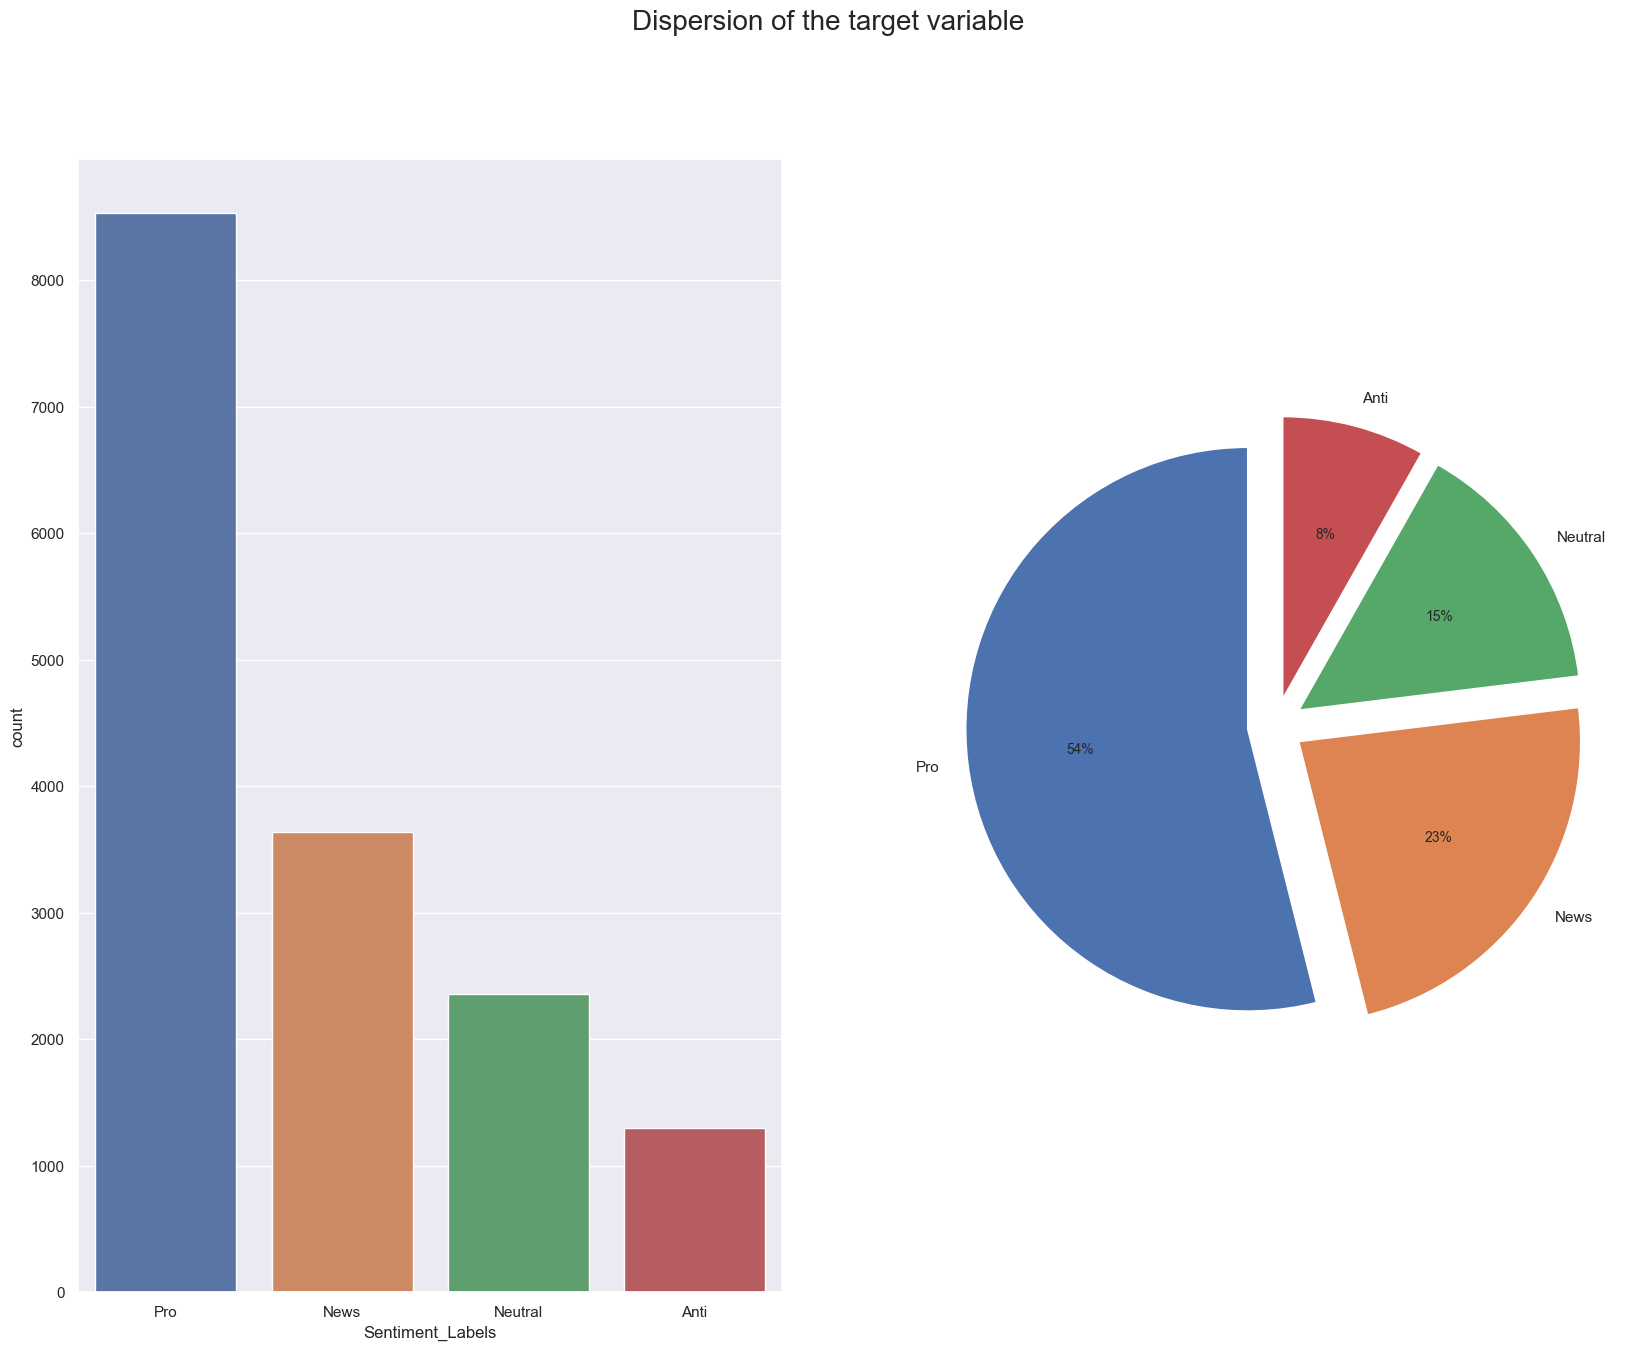

In [104]:
# Display target distribution

print("Percentage contribution:\n",train.Sentiment_Labels.value_counts(normalize=True)*100)

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 15), 
                         dpi=100)

sns.countplot(train['Sentiment_Labels'], ax=axes[0])

code_labels=['Pro', 'News', 'Neutral', 'Anti']
axes[1].pie(train['Sentiment_Labels'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Dispersion of the target variable', fontsize=20)
plt.show()

* #### Observations

Pro tweets occupy 53.92% of the total tweets.

News tweets occupy 23.02% of the total tweets.

Neutral tweets occupy 14.87% of the total tweets.

Anti tweets occupy 8.19% of the total tweets.


#### 3.2.2 Visualize tweet length for each class 

In [105]:
# Get the length of each message for each class
train['message'] = train['message'].apply(lp)
train['text_length'] = train['message'].apply(lambda x: len(x))
train.head()

,sentiment,message,tweetid,Sentiment_Labels,text_length
0,1,polyscimajor epa chief think carbon dioxide main cause global warming wait via,625221,Pro,78
1,1,like lack evidence anthropogenic global warming,126103,Pro,47
2,2,researcher say three year act climate change late,698562,News,49
3,1,wired pivotal year war climate change,573736,Pro,37
4,1,racist sexist climate change denying bigot leading poll,466954,Pro,55


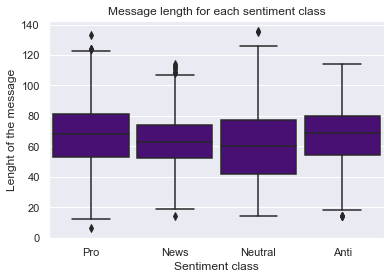

In [106]:
sns.boxplot(x=train['Sentiment_Labels'], y=train['text_length'], data=train, width = 0.9, color = 'indigo')
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.show()

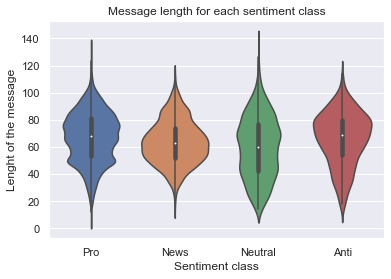

In [107]:
# Count the text length for each class type
sns.violinplot(x="Sentiment_Labels", y="text_length", data=train)
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.show()

##### Quick observations:
* Our target data, including the feature message, has no missing values.

* There is a significant disparity in sentiment groups.

* Sentiment class '1' (Pro) leads the graph with almost 54% of the vote, while class '-1' (Anti) comes in second with 8%.

* Both the upper and lower bounds of Sentiment Class Pro have outliers.

#### 3.4 Investigate the feature variable

We want to obtain a better understanding of the message and what it includes at this point in order to draw useful conclusions about our target variable.

#### 3.4.1 Sentiment Analysis


The process of sentiment analysis finds the underlying emotions in a piece of text. It is the process of categorizing literature into good, negative, or neutral categories. The values range from 1 to -1, with positive emotions decreasing from 1 to -1 and neutral emotion remaining at 0.

---
![Alt_text](https://editor.analyticsvidhya.com/uploads/61727sentiment-fig-1-689.jpeg)



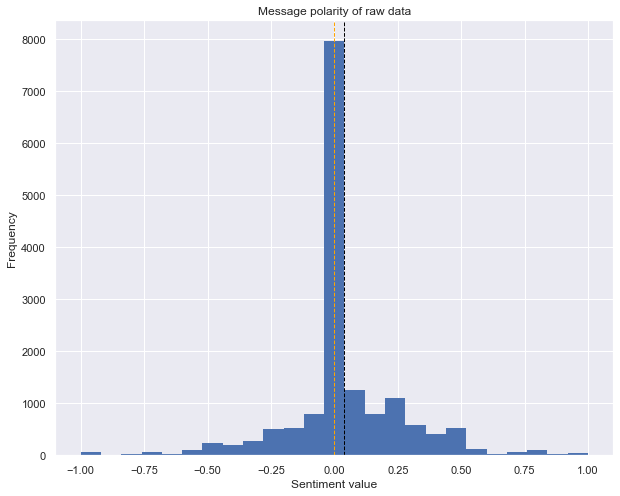

In [108]:
#Compare the sentiment analysis from raw data


train_eda['polarity']=train_eda['message'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train_eda['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of raw data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train_eda['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train_eda['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

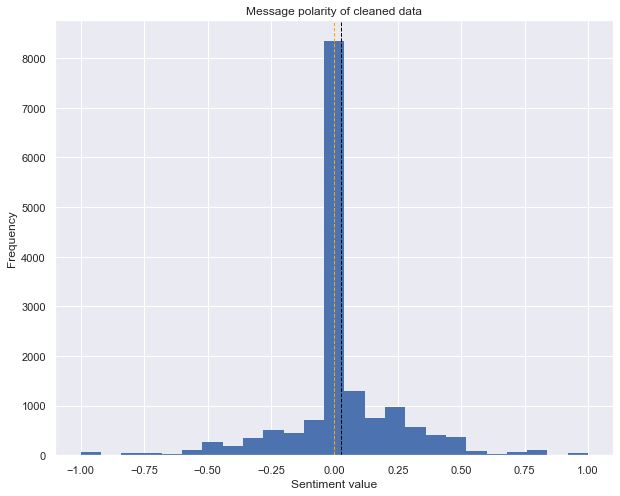

In [109]:
#Compare the sentiment analysis from cleaned data

train['message'] = train['message'].map(lambda x: list(map(str, filter(None, x.split(' ')))))
# Convert the cleaned message from list to string
train_eda['message'] = train['message'].str.join(' ')

train['polarity']=train_eda['message'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of cleaned data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

#### Observations

- Positively biased feelings, with the mean being higher than the median.
- The majority of tweets are of a neutral nature.
- Although cleaned data has a higher mean than raw data, the central tendency for both shows a similar trend.
- This guarantees that we didn't dilute the behavior of our data during the cleaning process.

#### 3.5 Investigative  text analysis
From here, we'll delve further into our text, looking into each term and its frequency of occurrence individually.

---

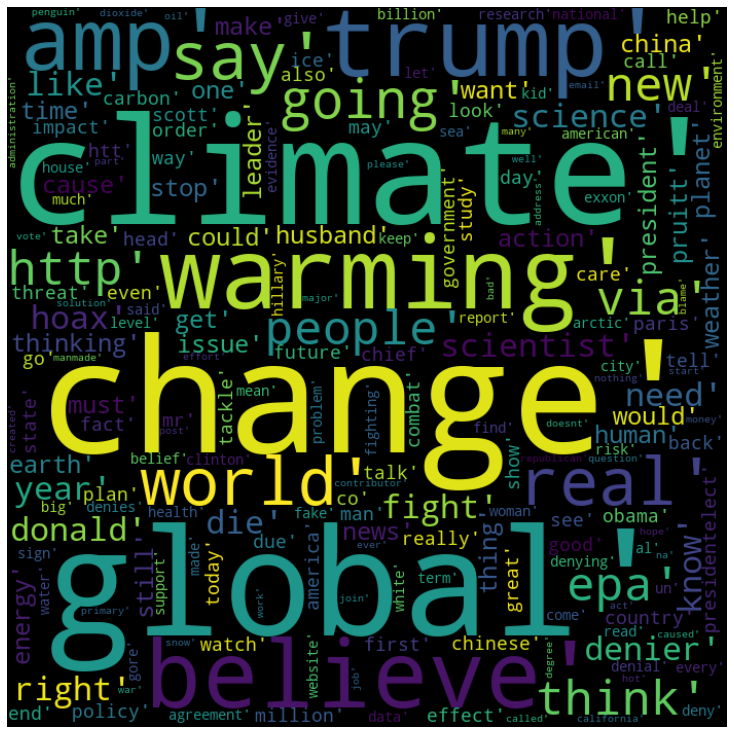

In [110]:
# WordCloud for cleaned data
words = train['message']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=700, height=700, background_color=
                      'black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 3.5.1 visualizing the text by sentiment

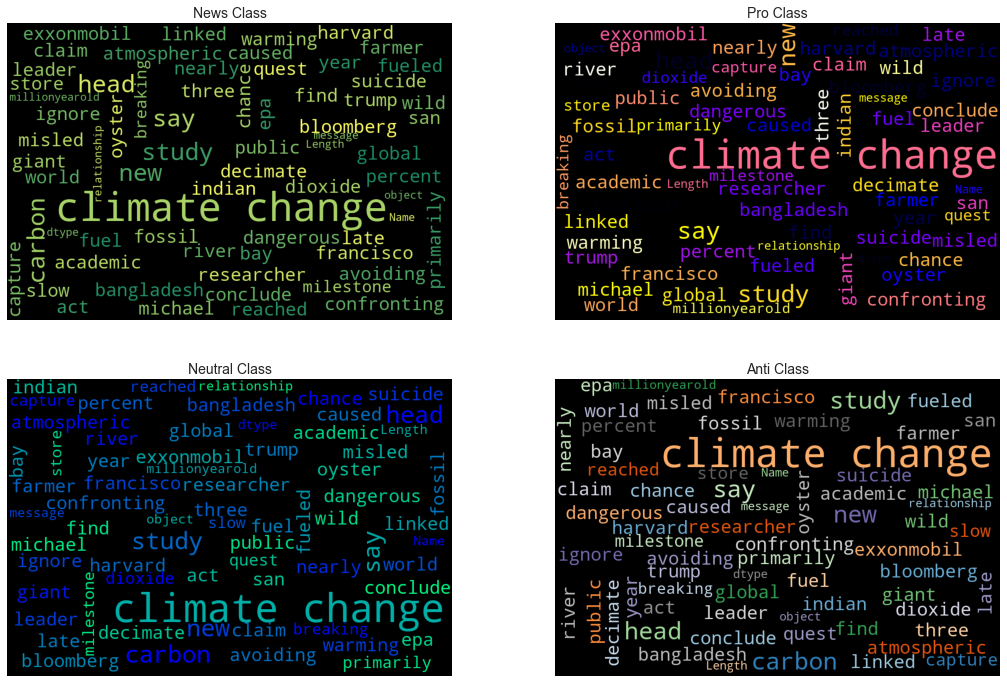

In [111]:
# Convert list to strings for each sentiment class
news = train['message'][train_eda['sentiment']==2].str.join(' ')
neutral = train['message'][train_eda['sentiment']==2].str.join(' ')
pro = train['message'][train_eda['sentiment']==2].str.join(' ')
anti = train['message'][train_eda['sentiment']==2].str.join(' ')

#Visualize each sentiment class

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

news_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='summer').generate(str(news))
axis[0, 0].imshow(news_wordcloud)
axis[0, 0].set_title('News Class',fontsize=14)
axis[0, 0].axis("off") 

neutral_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(neutral))
axis[1, 0].imshow(neutral_wordcloud)
axis[1, 0].set_title('Neutral Class',fontsize=14)
axis[1, 0].axis("off") 

pro_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='gnuplot2', min_font_size=10).generate(str(pro))
axis[0, 1].imshow(pro_wordcloud)
axis[0, 1].set_title('Pro Class',fontsize=14)
axis[0, 1].axis("off") 

anti_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='tab20c', min_font_size=10).generate(str(anti))
axis[1, 1].imshow(anti_wordcloud)
axis[1, 1].set_title('Anti Class',fontsize=14)
axis[1, 1].axis("off") 

plt.show()

* Before completing the exploratory data analysis

Let's have a look at how the sentiment class reacts to climate change through tweets.

In [112]:
gb = train_eda.groupby('sentiment')
Anti = "".join(gb.get_group(-1)['message'])
Neutral = "".join(gb.get_group(0)['message'])
Pro = "".join(gb.get_group(1)['message'])
News = "".join(gb.get_group(2)['message'])

* ## Anti Sentiment Class

In [113]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(-1)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
people saying dont look sun people say climate change real know thats lie
noaa scientist manipulated temperature data make global warming seem worse surprised
noaa global warming data manipulation
really science religious fundamentalism climate change cult sprinkling
biggest threat environment global warming overpopulation fuelled liberal aid thi


#### As a result of the above, the Anti Sentiment class thinks that global climate change is a government-engineered hoax.

---

* ## Neutral Sentiment Class

In [114]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(0)['message'][1000:1005]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
climate change healthcare tax alzheimer supreme court race equality immigration policing war wor
next blaming climate change fuck reprehensible creature
making environment great againtrump environment chief say co main cause global warming
make deal part climate change everyone part planet
always start conversation talking global warming real icebreaker high five


#### The class of neutral feelings is always neutral; they are neither proponents nor opponents of the subject at hand.

---

* ## Pro Sentiment Class

In [115]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(1)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
call take urgent action combat change impact join movement
yo kid believe climate change kid scientific fact matte
thinking going die husband believe climate change
china call donald trump climate change know bad
exxonmobil long history peddling misinformation climate change http


#### Climate Change Activists make up the majority of the Pro Sentiment class, and they have a no-holds-barred attitude toward government engagement in climate change.
---

* ## News Sentiment Class

In [116]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(2)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
industry could trouble due global warming researcher warn
trump really want face kid climate change
five pacific island lost rising sea climate change hit
nasa defiantly communicating climate change science despite trump doubt lift em yall
peru suffering worst flood recent historyand scientist say global warming blame


#### The news sentiment class is generally curious, and they want to know the truth about climate change.

#### 3.5.2 Extract the top  most used words

#### - Extract the hastags

In [117]:
# Get hashtags from raw data

train_eda = pd.read_csv('train.csv')
train_eda['no_stopwords'] = train_eda['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

hashtag = [item for item in train_eda['no_stopwords'].str.split() if item[0].startswith('#')]
hashtag = sum(hashtag, [])
count = nltk.FreqDist(hashtag)  
hashtag = pd.DataFrame({'hashtags': list(count.keys()),
                       'count': list(count.values())})
hashtag = hashtag.nlargest(20, columns="count")
hashtag['hashtags'] = hashtag['hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
hashtag = hashtag.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
hashtag = (hashtag.groupby("hashtags").agg({"count": np.sum}))
hashtag = hashtag.sort_values(by='count', ascending=True)
hashtag = hashtag.drop(index="")
hashtag.index = hashtag.index.str.capitalize()

hashtag.sort_values(by='count', ascending=False).head()

,count
hashtags,
Climate,156
Change,136
Global,40
Warming,21
Trump,15


#### - Visualizing the data

In [118]:
fig = px.bar(hashtag, x='count', y=hashtag.index, color='count', title='Top 15 Hashtags in the whole data',
             template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'}).update_xaxes(categoryorder='total ascending')
fig.show()


#### - Visualizing in a tree map view

In [119]:
fig = px.treemap(hashtag, title='Treemap chart by Top 15 Hashtags in the whole data',
                 path=[hashtag.index], values = 'count',color='count', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

##### Quick observation
- Climate, Change, Global, and warming are the top four hashtags, which is to be expected given that these are the important phrases in ensuring that tweets are easily found
- According to  [this article](https://www.azocleantech.com/article.aspx?ArticleID=3), there is a link between climate change and global warming, which explains why the hashtags "global" and "warming" are in the top four.



#### 3.5.3 visualizing the data by sentiment

In [120]:
#Start-off by sorting the dataframe for each sentiment class

# News
news_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 2].str.split() if item[0].startswith('#')]
news_hashtag = sum(news_hashtag, [])
count = nltk.FreqDist(news_hashtag)  
news_hashtag = pd.DataFrame({'news_hashtags': list(count.keys()),
                       'count': list(count.values())})
news_hashtags = news_hashtag.nlargest(10, columns="count")
news_hashtags = news_hashtags.drop(index=17)
news_hashtags['news_hashtags'] = news_hashtags['news_hashtags'].map(lambda x: remove_punc(str(x))).str.strip()
news_hashtags['news_hashtags'] = news_hashtags['news_hashtags'].str.capitalize()
news_hashtags = news_hashtags.sort_values(by='count', ascending=False)

# Pro
pro_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 1].str.split() if item[0].startswith('#')]
pro_hashtag = sum(pro_hashtag, [])
count = nltk.FreqDist(pro_hashtag)  
pro_hashtag = pd.DataFrame({'pro_hashtags': list(count.keys()),
                       'count': list(count.values())})
pro_hashtags = pro_hashtag.nlargest(10, columns="count")
pro_hashtags['pro_hashtags'] = pro_hashtags['pro_hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
pro_hashtags = (pro_hashtags.groupby("pro_hashtags").agg({"count": np.sum}))
pro_hashtags.index = pro_hashtags.index.str.capitalize()
pro_hashtags = pro_hashtags.sort_values(by='count', ascending=True)

# Neutral
neut_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 0].str.split() if item[0].startswith('#')]
neut_hashtag = sum(neut_hashtag, [])
count = nltk.FreqDist(neut_hashtag)  
neut_hashtag = pd.DataFrame({'neutral_hashtags': list(count.keys()),
                       'count': list(count.values())})
neutral_hashtags = neut_hashtag.nlargest(10, columns="count")
neutral_hashtags = neutral_hashtags.drop(index=4)
neutral_hashtags['neutral_hashtags'] = neutral_hashtags['neutral_hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
neutral_hashtags = (neutral_hashtags.groupby("neutral_hashtags").agg({"count": np.sum}))
neutral_hashtags.index = neutral_hashtags.index.str.capitalize()
neutral_hashtags = neutral_hashtags.sort_values(by='count', ascending=False)

# Anti
anti_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == -1].str.split() if item[0].startswith('#')]
anti_hashtag = sum(anti_hashtag, [])
count = nltk.FreqDist(anti_hashtag)  
anti_hashtag = pd.DataFrame({'anti_hashtags': list(count.keys()),
                       'count': list(count.values())})
anti_hashtags = anti_hashtag.nlargest(10, columns="count")
anti_hashtags['anti_hashtags'] = anti_hashtags['anti_hashtags'].map(lambda x: remove_punc(str(x))).str.strip()
anti_hashtags['anti_hashtags'] = anti_hashtags['anti_hashtags'].str.capitalize()
anti_hashtags = anti_hashtags.sort_values(by='count', ascending=True)


#### - Ploting the graph

In [121]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{}, {}]],
    subplot_titles=("Anti Hashtags","Neutral Hashtags", "Pro Hashtags", "News_hashtags"))


fig.add_trace(go.Bar(y=anti_hashtags['count'], x= anti_hashtags["anti_hashtags"]),
              row=1, col=1)

fig.add_trace(go.Bar(x=neutral_hashtags.index, y=neutral_hashtags['count']),
              row=1, col=2)

fig.add_trace(go.Bar(x=pro_hashtags.index, y=pro_hashtags["count"]),
              row=2, col=1)

fig.add_trace(go.Bar(x=news_hashtags["news_hashtags"], y=news_hashtags["count"]),
              row=2, col=2)

fig.update_layout(height=700,width = 900, showlegend=False, title_text="Top hashtags comparison for different sentiment classes")

fig.show()

##### Quick observation
- Climate, Change, Global, and warming are the top four hashtags, which is to be expected given that these are the important phrases in ensuring that tweets are easily found
- According to  [this article](https://www.azocleantech.com/article.aspx?ArticleID=3), there is a link between climate change and global warming, which explains why the hashtags "global" and "warming" are in the top four.
- The anti hastag group uses the word "faked" as one of their top four most often used words to demonstrate that they do not believe in global warming.

### 5.5 Named Entity Recognition
- in the section we would determine the names of the persons and organizations who are most frequently mentioned in each sentiment category.

(Named Entity Recognition (NER) is a technique that parses a sentence or a block of text for entities that may be classified as names, organizations, locations, quantities, monetary values, percentages, and so on. Only names, locations, and organizations were incorporated in traditional NER algorithms. They may now be dynamically taught to extract more than only the entities listed earlier. If a chunk of entities is located, NER is a simple but effective method )

#### 5.5.1 Named Entity Recognition (Person)

In [122]:
train['sent_labels']  = train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train.head(3)
nlp = en_core_web_sm.load()
nlp.max_length = 4000000

In [123]:
# train_a = train[train['sent_labels'].isin(['Anti','Neutral','Pro','News'])]
# tokens = nlp(''.join(str(train_a['message'].tolist())))
# items = [word.text for word in tokens.ents]

# person_list = []
# for ent in tokens.ents:
#     if ent.label_ =='PERSON':
#          person_list.append(ent.text)

# person_counts = Counter(person_list).most_common()

# df_a = pd.DataFrame(person_counts, columns=['person','count'])
# df_a['person'] = df_a['person'].str.capitalize()

# df_a.head(5)

In [124]:
# fig = px.treemap(df_a, path=['person'],title='Treemap chart by Top Persons in the whole data',
#                  values='count', color= "count")
 
# fig.show()

In [125]:
# #PEOPLE INCLUDED IN PRO SENTIMENT
# train_pro = train[train['sent_labels'] == 'Anti']
# tokens = nlp(''.join(str(train_pro['message'].tolist())))
# items = [word.text for word in tokens.ents]

# person_list = []
# for ent in tokens.ents:
#     if ent.label_ =='PERSON':
#          person_list.append(ent.text)

# person_counts = Counter(person_list).most_common()

# df_pro = pd.DataFrame(person_counts, columns=['person','count'])
# df_pro['person'] = df_pro['person'].str.capitalize()

# df_pro.head(5)

In [126]:
# fig = px.treemap(df_pro, path=['person'],title='Treemap chart by Top Persons in the Pro Sentiment Section',
#                  values='count', color= "count")
 
# fig.show()

In [127]:
# #PEOPLE INCLUDED IN ANTI SENTIMENT
# train_anti = train[train['sent_labels'] == 'Anti']
# tokens = nlp(''.join(str(train_anti['message'].tolist())))
# items = [word.text for word in tokens.ents]

# person_list = []
# for ent in tokens.ents:
#     if ent.label_ =='PERSON':
#          person_list.append(ent.text)

# person_counts = Counter(person_list).most_common()

# df_anti = pd.DataFrame(person_counts, columns=['person','count'])
# df_anti['person'] = df_anti['person'].str.capitalize()

# df_anti.head()

In [128]:
# fig = px.treemap(df_anti, path=['person'],title='Treemap chart by Top Persons in the Anti Sentiment Section',
#                  values='count', color= "count")
 
# fig.show()

In [129]:
# #PEOPLE INCLUDED IN NEUTRAL SENTIMENT
# train_neutral = train[train['sent_labels'] == 'Neutral']
# tokens = nlp(''.join(str(train_neutral['message'].tolist())))
# items = [word.text for word in tokens.ents]

# person_list = []
# for ent in tokens.ents:
#     if ent.label_ =='PERSON':
#          person_list.append(ent.text)

# person_counts = Counter(person_list).most_common()

# df_neutral = pd.DataFrame(person_counts, columns=['person','count'])
# df_neutral['person'] = df_neutral['person'].str.capitalize()

# df_neutral.head()

In [130]:
# fig = px.treemap(df_neutral, path=['person'],title='Treemap chart by Top Persons in the neutral Sentiment Section',
#                  values='count', color= "count")
 
# fig.show()

In [131]:
# #PEOPLE INCLUDED IN NEWS SENTIMENT
# train_news = train[train['sent_labels'] == 'News']
# tokens = nlp(''.join(str(train_news['message'].tolist())))
# items = [word.text for word in tokens.ents]

# person_list = []
# for ent in tokens.ents:
#     if ent.label_ =='PERSON':
#          person_list.append(ent.text)

# person_counts = Counter(person_list).most_common()

# df_news = pd.DataFrame(person_counts, columns=['person','count'])
# df_news['person'] = df_news['person'].str.capitalize()

# df_news.head()

In [132]:
# fig = px.treemap(df_news, path=['person'],title='Treemap chart by Top Persons in the News Sentiment Section',
#                  values='count', color= "count")
 
# fig.show()

#### observations
*
*
*

#### 5.5.2 Named Entity Recognition (ORGANIZATIONS)

In [133]:
# #ORGANIZATIONS INCLUDED IN Pro SENTIMENT
# train_oa = train[train['sent_labels'].isin(['Anti','Neutral','Pro','News'])]
# tokens = nlp(''.join(str(train_oa['message'].tolist())))
# items = [word.text for word in tokens.ents]

# org_list = []
# for ent in tokens.ents:
#     if ent.label_ =='ORG':
#         org_list.append(ent.text)

# org_counts = Counter(org_list).most_common()

# df_org_a = pd.DataFrame(org_counts, columns=['organization','count'])
# df_org_a['organization'] = df_org_a['organization'].str.upper()

# df_org_a.head(5)

In [134]:
# #visualizing the data
# fig = px.treemap(df_org_a, path=['organization'],title='Treemap chart by Top organizations in the whole data',
#                  values='count', color= "count")
 
# fig.show()

In [135]:
# #ORGANIZATIONS INCLUDED IN Pro SENTIMENT
# train_pro = train[train['sent_labels'] == 'Pro']
# tokens = nlp(''.join(str(train_pro['message'].tolist())))
# items = [word.text for word in tokens.ents]

# org_list = []
# for ent in tokens.ents:
#     if ent.label_ =='ORG':
#         org_list.append(ent.text)

# org_counts = Counter(org_list).most_common()

# df_org_pro = pd.DataFrame(org_counts, columns=['organization','count'])
# df_org_pro['organization'] = df_org_pro['organization'].str.upper()

# df_org_pro.head()

In [136]:
# fig = px.pie(df_org_pro, values='count', names='organization',
#              title='Pie chart by Top organizations in the Pro Sentiment Section',)
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [137]:
# #ORGANIZATIONS INCLUDED IN NEWS SENTIMENT
# train_news = train[train['sent_labels'] == 'News']
# tokens = nlp(''.join(str(train_news['message'].tolist())))
# items = [word.text for word in tokens.ents]

# org_list = []
# for ent in tokens.ents:
#     if ent.label_ =='ORG':
#         org_list.append(ent.text)

# org_counts = Counter(org_list).most_common()

# df_org = pd.DataFrame(org_counts, columns=['organization','count'])
# df_org['organization'] = df_org['organization'].str.upper()

# df_org.head()

In [138]:
# fig = px.pie(df_org, values='count', names='organization',
#              title='Pie chart by Top organizations in the News Sentiment Section',)
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [139]:
# #ORGANIZATIONS INCLUDED IN NEUTRAL SENTIMENT
# train_neutral = train[train['sent_labels'] == 'Neutral']
# tokens = nlp(''.join(str(train_neutral['message'].tolist())))
# items = [word.text for word in tokens.ents]

# org_list = []
# for ent in tokens.ents:
#     if ent.label_ =='ORG':
#         org_list.append(ent.text)

# org_counts = Counter(org_list).most_common()

# df_org_neutral= pd.DataFrame(org_counts, columns=['organization','count'])
# df_org_neutral['organization'] = df_org_neutral['organization'].str.upper()

# df_org_neutral.head()

In [140]:
# fig = px.pie(df_org_neutral, values='count', names='organization',
#              title='Pie chart by Top organizations in the Neutral Sentiment Section',)
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

In [141]:
#ORGANIZATIONS INCLUDED IN ANTI SENTIMENT
train_anti = train[train['sent_labels'] == 'Anti']
tokens = nlp(''.join(str(train_anti['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org_anti = pd.DataFrame(org_counts, columns=['organization','count'])
df_org_anti['organization'] = df_org_anti['organization'].str.capitalize()
df_org_anti['organization'] = df_org_anti['organization'].str.upper()


df_org_anti.head()

,organization,count
0,EPA,9
1,CNN,7
2,NATO,2
3,SEC,2
4,GOP,1


In [142]:
fig = px.pie(df_org_anti, values='count', names='organization',
             title='Pie chart by Top organizations in the Anti Sentiment Section',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<a id="six"></a>
## 6. Classification Models
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Classification Models ⚡ |
| :--------------------------- |
| In this section, we'll look at different models, try to explain them, and learn about their benefits and drawbacks. |

---

*  Decision Tree Classifier<a id='DS'></a>
*  RandomForest Classifier<a id='random'></a>
*  LinearSVC(Support Vector Classifier)<a id='svc'></a>
*  LGBMClassifier(Light Gradient Boosting Machine Classifier)<a id='LGBM'></a>
*  Logistic Regression
*  Stochastic
*  Support Vector Classifier

<a id="seven"></a>
## 7. Data or feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we would be: We will be looking at one of feature selection in text data namely the `tfidfVectorizer`. |

---
### 7.1 `TF-IDF`

<a id='tfidf'></a>

Term Frequency — Inverse Text Frequency (TF-IDF) is a statistic that attempts to better quantify how essential a term is for a document while also considering its relationship to other papers in the same corpus.
This is done by counting the number of times a term appears in a document as well as the number of times the same word appears in other documents in the corpus.
`vocabulary_` Is a dictionary that turns each word in the text into a feature index in the matrix, with a feature index for each unique token.

#### -  Creating our X and y Metrics


In [143]:
# train['message'] =train['message'].apply(lambda x: ' '.join([str(i) for i in x]))
train['message'] = train['message'].apply(lp)

In [144]:
X = train['message']
y = train['sentiment']
X_test = test['message']

# X = train_data['message']
# y = train_data['sentiment']
# X_test = test_data['message']

#### - Splitting data into train and validation sets

Separating data into training and validation sets is an important part of evaluating our models. 
In our case we will randomly split the train data into 80% train and 20% validation. 
After our model is trained with the train data we then use it to make predictions for the target using the validation set,Because the data in the validation set already contains known values for the target variable this will make it easy  for us to asses our model's accuracy.

In [145]:
# Splitting the data into 80% train and 20% validation set
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.3,shuffle=True, stratify=y, random_state=42)

In [146]:
vector = TfidfVectorizer(ngram_range=(1,20), min_df=2)

In [147]:
train_features = vector.fit_transform(train['message'])
test_features = vector.transform(train['message'])

In [148]:
print(train_features.shape, test_features.shape)

(15819, 55488) (15819, 55488)


In [149]:
tfidf_df = pd.DataFrame(train_features.todense(), columns=vector.get_feature_names_out())

In [150]:
tfidf_df.head()

,aaaand,ab,ab climate,abandon,abandon deal,abandon deal http,abandon hope,abandon hope zoe,abandon hope zoe williams,abandoned,...,zika epidemic scientist report,zinke,zinke sign,zinke sign alaskan,zinke sign alaskan drilling,zinke sign alaskan drilling order,zoe,zoe williams,zone,zone amp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
#Training dataset

X = train_features #Independent Variables also known as Features
y = train['sentiment'] #Dependent Variable also known as Target

#Test dataset

Text_X = test_features #Testing Features
tweetid = test['tweetid'] #Index tweetid.

In [152]:
X_train, X_test, y_train, y_test =train_test_split(X, 
                                                   y, 
                                                   test_size=0.3, 
                                                   shuffle=True,
                                                   random_state=42)

#### The next step will be to solve our data imbalanced issue we noticed while performing EDA.

Lets try solving our imbalance data problem using Synthetic Minority Oversampling Techniques (SMOTE)

SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier

First we instantiate smote as sm

In [153]:
sm = SMOTE()

Then we fit smote on the splitted train dataset only, we dont want to be biased when predicting the accuracy of the model by specifying falsified data.

In [154]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Alright lets now see the changes

In [155]:
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_sm))

Before SMOTE: Counter({1: 5932, 2: 2559, 0: 1687, -1: 895})
After SMOTE: Counter({2: 5932, 0: 5932, 1: 5932, -1: 5932})


Before SMOTE the Sentiment Classes data where not equally distributed, but with SMOTE all classes as a similar distribution.

<a id='Pipelines'></a>

### 6.2 Pipelines

A 'pipeline' is a tool that applies a set of transformations and a final estimator in a sequential manner. The pipeline's intermediate phases implement fit and transform techniques, whereas the final estimator simply has to implement fit. Pipelines will assist us in transforming the train, validation, and test data, as well as training our models, in our scenario.

Because our models can only process numerical data, the first step is to create a pipeline that converts text data to numeric data. In this notebook, we'll focus on two feature engineering methods that we'll use to convert text data to numeric data: TfidfVectorizer and Word2Vec, and then we'll train our models using these pipelines.

We'll be utilizing 'tfidfVectorizer' to produce features for pipelines.

<a id='classifiers'></a>

#### 6.2.1 Building classification  pipelines


In [156]:
names1 = ['LogisticRegression',  'ForestClassifier', 'LinearSVC',"DecisionTreeClassifier", "LGBMClassifier","SGDClassifier","SVC"]

In [157]:
classifiers = [
    LogisticRegression(C=1000, multi_class='ovr', solver='saga', random_state=11, max_iter=10),
    RandomForestClassifier(criterion='entropy'),
    MultinomialNB(alpha=1),
    LinearSVC(C=10, class_weight=None),
    DecisionTreeClassifier(),
    LGBMClassifier(),
    SGDClassifier(),
    SVC(),
]



<a id='raw_tweets'></a>

#### 6.3 Training models

Each model is trained using a unique pipeline that takes raw text input, converts it to numeric data, and sets the default parameters for the classifier.

In [158]:
results = []
models = {}
for name, clf in zip(names1, classifiers):
    print('Fitting {:s} model.....'.format(name))
    # We train each model using .fit
    clf.fit(X_train_sm, y_train_sm)
    
    
    #Predict the Target Class with the below code using .predict
    print('..... Predicting')
    y_pred = clf.predict(X_test)
    train_pred = clf.predict(X_train_sm)
    
    #Score the models with the accuracy and F1_score.
    print('..... Scoring')
    accuracy = accuracy_score(y_test, y_pred) # Test Accuracy
    f1_Score = f1_score(y_test, y_pred, average='macro')
    train_f1_Score = f1_score(y_train_sm, train_pred, average='macro')
    
    #Save the results to dictionaries
    models[name] = clf
    
    results.append([name, accuracy, f1_Score, train_f1_Score])
    
#Creating a df from the results    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy Score', 'F1 Score', 'Train F1 Score'])
results.set_index('Classifier', inplace=True)

Fitting LogisticRegression model.....
..... Predicting
..... Scoring
Fitting ForestClassifier model.....
..... Predicting
..... Scoring
Fitting LinearSVC model.....
..... Predicting
..... Scoring
Fitting DecisionTreeClassifier model.....
..... Predicting
..... Scoring
Fitting LGBMClassifier model.....
..... Predicting
..... Scoring
Fitting SGDClassifier model.....
..... Predicting
..... Scoring
Fitting SVC model.....
..... Predicting
..... Scoring


In [159]:
results.sort_values('F1 Score', ascending=False)

,Accuracy Score,F1 Score,Train F1 Score
Classifier,,,
SVC,0.684998,0.615792,0.928046
LogisticRegression,0.691530,0.606176,0.987651
SGDClassifier,0.677834,0.604721,0.891951
DecisionTreeClassifier,0.671724,0.587145,0.993049
ForestClassifier,0.689633,0.582027,0.997429
LinearSVC,0.629161,0.579719,0.897283
LGBMClassifier,0.606195,0.514580,0.997429


<a id='raw_tweets'></a>

#### 6.4 Model evalution

##### - Performance Metrics for model evaluation

The F1 Score, which is the number of true cases for each label, will be used to assess our models.

- ####  Precision
The ratio of accurately predicted positive observations to total expected positive observations is known as precision.

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

- #### Recall
The capacity of the classifier to discover all the positive samples is known as recall.

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

- #### F1 Score
In machine learning, the F1-score is one of the most crucial assessment measures. It effectively summarizes a model's prediction ability by combining two variables that would otherwise be at odds - precision and recall. 

(Weighted average of precision and recall.)

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

[2] "News": Tweets regarding climate change that are based on facts.

[1] "Pro": Tweets in favor of man-made climate change.

[0] "Neutral": tweets are those that neither support nor refute climate change theories.

[-1] "Anti" : tweets are those who do not believe in man-made climate change.

#### - To evaluate the base models we first start with making predictions for the validation set

In [160]:
# Making validations set predicions

tree_prediction = tree.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc.predict(X_val) # LinearSVClassifier Predictions
lgbm_prediction = lgbm.predict(X_val) # LGBMClassifier Model predictions
logreg_prediction = logreg.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc.predict(X_val) # Support vector machine predictions

NameError: name 'tree' is not defined

#### 6.4.1 Evalution of DecisionTreeClassifier


In [ ]:
#Evaluatung with confusion matrix
print(confusion_matrix(y_val, tree_prediction))

In [ ]:
#visualizing the results
print('\nDecision Tree\n', classification_report(y_val, tree_prediction))
plot_confusion_matrix(y_val, tree_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Key Observations
A classification report is used to assess the accuracy of a classification algorithm's predictions.

+ We can observe that pro climate change has a precision of 68 percent, which is higher, followed by news, neutral, and anti climate change.

+ In comparison to the models we've tried, the precision for anti-climate change and neutral is lower.

+ The pro-climate class has the greatest recall value of 73 percent.

+ The recall of neutral is as low as 4%.



The recall score for each sentiment class is shown in the confusion matrix heatmap.

In [ ]:
# # Visual represetation of of the f1 score for each class
report_tree = classification_report(y_val, tree_prediction, output_dict=True)
df_tree = pd.DataFrame(report_tree).transpose()
df_tree.drop(['accuracy'], inplace = True)
df_tree.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_tree.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Decision Tree Classiffier')
plt.show()

### Key Observations

The f1 score for each sentiment class using the Decision Tree classifier is shown in the bar graph above.

- We can observe that the decision tree model performed a great job classifying 'Pro climate change' tweets, followed by 'News' and 'Neutral' tweets, in that order.

- With a f1 score of less than 0.3, the Decision Tree classifier performed a bad job classifying 'Anti Climate Change' tweets.

- Given the imbalance in our train data, where 'Anti climate change' tweets only account for 8% of all tweets in the train dataset, poor categorization of 'Anti climate change' tweets is predicted.

In [ ]:
# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall Accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )


#### 6.4.2  Evalution of RandomForestClassifier

In [ ]:
#Evaluatung with confusion matrix
print('\nRandomForestClassifier\n', confusion_matrix(y_val, rfc_prediction))


In [ ]:
print('\nRandomForestClassifier\n', classification_report(y_val, rfc_prediction))
plot_confusion_matrix(y_val, rfc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Random Forest Classification')
plt.show()

#### Key Observations

- We can observe that anti-climate has a precision of 91 percent, neutral has a precision of 72 percent, and news has a precision of 76 percent, which is greater than 'Decision Tree.'

- When compared to 'Decision Tree,' the recall values for the pro-climate class are 91 percent and news is 70 percent.

- When compared to 'Decision Tree,' anti-climate recalls decreased.

In [ ]:
# # Visual represetation of of the f1 score for each class
report_rfc = classification_report(y_val, rfc_prediction, output_dict=True)
df_rfc = pd.DataFrame(report_rfc).transpose()
df_rfc.drop(['accuracy'], inplace = True)
df_rfc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_rfc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Random Forest Classiffier')
plt.show()

#### Important Points to Consider

The f1 score for each sentiment class using the Random Forest classifier is shown in the graph above.

- We can observe that the Random Forest model performed a better job classifying 'Pro climate change' tweets and 'News' tweets than the Decision tree model, with both sentimetents scoring over 0.7. with 'Neutral' tweets following after that.

- With a f1 score lower than the one we acquired using the 'Decision Tree' classifier, the Random Forest classifier performed a bad job classifying 'Anti climate Change' tweets.

In [ ]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')

#### 6.4.3 Evaluation of LinearSVClassifier

In [ ]:
print('\nLinearSVC Model\n', confusion_matrix(y_val, Lsvc_prediction))

In [ ]:
print('\nLinearSVC Model\n', classification_report(y_val, Lsvc_prediction))
plot_confusion_matrix(y_val, Lsvc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('LinearSCV Classification')
plt.show()

### Important Areas to Note

+ We can observe that anti climate has an accuracy of 69 percent, which is greater than 'Decision Tree' but lower than 'Random Forest.'

+ Pro climate has a precision of 69 percent, which is greater than 'Decision Tree' and 'Random Forest.'

+ When compared to 'Decision Tree' and 'Random Forest,' the news class has the highest recall score of 81 percent.
+ When compared to 'Random Forest,' the pro-climate class had a lower recall value. When compared to 'Random Forest' and 'Decision Tree,' anti-climate recall rose.

In [ ]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, Lsvc_prediction, output_dict=True)
df_svc = pd.DataFrame(report_svc).transpose()
df_svc.drop(['accuracy'], inplace = True)
df_svc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_svc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for LinearSVC ')
plt.show()

### Important Observations

Using the LinearSVC, the f1 score for each sentiment class is shown in the bar graph above.

- We can observe that the LinearSVC model did a far better job at classifying 'Pro climate change' tweets than the 'Decision Tree' and 'RandomForest' models, with a f1 score of above 0.8 for the label 1 sentiment class.

- When compared to both the Decision tree and RandomForest models, the LinearSVC model did a considerably better job identifying 'News' tweets, with the highest score level 2 sentiment class of over 0.75.

- We also notice a significant increase in the categorization of "anti-climate change" tweets, with a f1 score of just over 0.5, up from just under 0.3 using the "Decision Tree" classifier.

- The LinearSVC made a minor improvement in the categorization of 'neutral' tweets, but it was considerably outweighed by the gains in other sentiments classes.

In [ ]:
linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')

#### 6.4.4 Evaluation of LGBMClassifier

In [ ]:
print('\nLightGBM\n', confusion_matrix(y_val, lgbm_prediction))

In [ ]:
print('\nLightGBM\n', classification_report(y_val, lgbm_prediction))
plot_confusion_matrix(y_val, lgbm_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('LightGBM Classification')
plt.show()

### Important Points to Consider

+ When compared to 'LinearSVC' and 'Random Forest,' we can find that anti climate and neutral accuracy has reduced by 66%. However, when compared to 'Decision Tree,' it has risen.

+ When compared to 'LinearSVC' and 'Random Forest,' the recall values for the pro climate class of 84 percent have decreased, but they have increased when compared to 'Decision Tree.'
+ In comparison to 'Random Forest,' 'LinearSVC,' and 'Decision Tree,' the recall of the neutral class rose.

In [ ]:
# # Visual represetation of of the f1 score for each class
report_lgbm = classification_report(y_val, lgbm_prediction, output_dict=True)
df_lgbm = pd.DataFrame(report_lgbm).transpose()
df_lgbm.drop(['accuracy'], inplace = True)
df_lgbm.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_lgbm.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for LightGBM')
plt.show()

#### Important Points to Consider

The f1 score for each sentiment class is depicted in the bar graph above using the LightGBM.

- Despite outperforming the 'Decision Tree' and 'Random Forest' models in identifying 'Pro climate tweets' and 'News,' the LightGBM model still falls short of the 'LinearSVC' model.

- We see a little increase in the classification of 'neutral' tweets when compared to the categorization of 'LinearSVC' tweets.

- Although 'LightGBM' has a lower categorization of 'Anti climate change' tweets than 'LinearSVC,' it still outperforms the first two models we looked at, 'Decision Tree' and 'Random Forest.'

In [ ]:
lGBM_acc = round(accuracy_score(y_val, lgbm_prediction),4)
print(f'\nOverall accuracy score for LightGBM :{lGBM_acc}')
lGBM_f1 = round(f1_score(y_val, lgbm_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for LightGBM :{lGBM_f1}')

#### 6.4.5 Evaluation of  Logistic Regression 

In [ ]:
# Report the confusion matrix
print('\nLogistic Regression\n', confusion_matrix(y_val, logreg_prediction))

In [ ]:
# Print a classification report

print('\nLogistic Regression\n', classification_report(y_val, logreg_prediction))
plot_confusion_matrix(y_val, logreg_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()



#### Consider the Following Points

+ Anti climate has a 76 percent accuracy, which is higher than 'Decision Tree,' 'LinearSVC,' and 'LGBMClassifier,' but not higher than 'Random Forest.'

+ When compared to 'Decision Tree,' 'LinearSVC,' and 'LGBMClassifier,' the pro climate class has the highest recall values of 89 percent, but it is not higher than 'Random Forest.'

+ In "recall," anti climate is the same as 'LGBMClassifier,' and it has risen in comparison to 'Random Forest' and 'Logistic Regression,' but has fallen in comparison to 'LinearSVC' and 'Decision Tree.'

In [ ]:
# # Visual represetation of of the f1 score for each class
report_logreg = classification_report(y_val, logreg_prediction, output_dict=True)
df_logreg = pd.DataFrame(report_logreg).transpose()
df_logreg.drop(['accuracy'], inplace = True)
df_logreg.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_logreg.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1 score per sentiment class for Logistic Regression')
plt.show()

#### observations (Type here)

In [ ]:
# Print the overall accuracy
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)


#### 6.4.6 Evaluation of SGD Classifier

In [ ]:
# Confusion matrix for the random forest classifier
print('\nSGD Classifier\n', confusion_matrix(y_val, SGD_prediction))

In [ ]:
# The classification report 
print('\nSGD Classifier  Classification report :\n', classification_report(y_val, SGD_prediction))
plot_confusion_matrix(y_val, SGD_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()


#### Key Observations

+ When compared to the 'Decision Tree,' the precision value for the news class decreased.

+ Anti and neutral are more accurate than 'Decision Tree,' 'LinearSVC,' LGBMClassifier,' and 'Logistic Regression.' It's not quite as gloomy as 'Random Forest,' but it comes close.

+ -The recall value for the pro climate class is 88 percent, which is greater than 'Random Forest,' and 'Logistic Regression,' when compared to 'Decision Tree,' 'LinearSVC,' and 'LGBMClassifier.'

+ Anti climate has a greater recall than 'Decision Tree,' 'Random Forest,' 'LGBMClassifier,' and 'Logistic Regression,' but not as high as 'LinearSVC.'

+ Neutral's recall is lower than that of 'Decision Tree,' 'LinearSVC,' and 'LGBMClassifier,' but greater than that of 'Random Forest,' and 'Logistic Regression.'

In [ ]:
# # Visual represetation of of the f1 score for each class
report_sgd = classification_report(y_val, SGD_prediction, output_dict=True)
df_sgd = pd.DataFrame(report_sgd).transpose()
df_sgd.drop(['accuracy'], inplace = True)
df_sgd.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_sgd.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SGD')
plt.show()

In [ ]:
# Checking the accuracy score
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)

# Checking the f1_score report for the decison tree model
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)

#### 6.4.7 Support Vector Classfifier

In [ ]:
# Confusion matrix for the Support Vector Classifier
print('\nSupport Vector Classifier\n', confusion_matrix(y_val, SVC_prediction))

In [ ]:
# The classification report 
print('\nSupport Vector Classifier  Classification report :\n', classification_report(y_val, SVC_prediction))
plot_confusion_matrix(y_val, SVC_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Support Vector Classification')
plt.show()


### Important Points to Keep in Mind

+ When compared to 'Decision Tree,' 'LinearSVC,' LGBMClassifier,'Logistic Regression,' and 'SGD Classifier,' anti climate has a greater accuracy. It's nothing more than the 'Random Forest' anti-climate.


+ The pro climate class has a recall value of 91%, which is the same as 'Random Forest' and higher than 'Decision Tree,'LinearSVC,'LGBMClassifier,'Logistic Regression,' and 'SGD Classifier.'

+ Anti climate has a lower recall than Decision Tree, LinearSVC, LGBMClassifier, Logistic Regression, and SGD Classifier, but it has a higher recall than Random Forest.

In [ ]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, SVC_prediction, output_dict=True)
df_SVC = pd.DataFrame(report_svc).transpose()
df_SVC.drop(['accuracy'], inplace = True)
df_SVC.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_SVC.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SVC')
plt.show()

#### Points to Remember
Using the Support Vector Classifier, the above bar graph depicts the f1 score for each sentiment class (SVC)

- Similar to the 'LinearSVC,' the 'SVC' performs an excellent job of identifying the 'Pro climate change' sentiment class with a score of 0.8, followed by the 'News' sentiment class with a f1 score of over 0.75.

- The 'Support Vector Classifier,' like the most of the models we've looked at so far, had trouble categorizing the 'anti climate change' attitude, scoring just over 0.3.

In [ ]:
    # Checking the accuracy score
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score :{svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1_score :{svc_f1}')

### 6.5 Model Comparision

Model comparison by accuracy and macro f1_score

In [ ]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'LGBM','Logistic Regression','Stochastic Gradient Descent','Support Vector Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,lGBM_acc,logistic_reg_acc, sgd_acc, svc_f1],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,lGBM_f1,logistic_reg_f1, sgd_f1, svc_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

In [ ]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='coolwarm_r')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### Final Observations

We can see a comparison of the 7 models we've tried so far based on their 'accuracy score' and accompanying 'weighted f1 score' in the upper bar graph.

- We can see that our top three best performing models are 'LinearSVC,"Stochastic Gradient Descent,' and 'Logistic Regression,' which we will apply in ensemble approaches to try to enhance our findings.

- The 'Decision Tree' classifier performs the poorest at categorizing tweets, with 0.61 and 0.60 weighted f1 scores, respectively.



**With an accuracy score of 0.74 and a weighted f1 score of 0.72, LinearSVC is the highest performing model out of the 7 models we've tried so far**

### 6.6 Ensemble Methods

Ensemble learning is the practice of combining many models to improve overall model performance in machine learning. Ensembles are made up of several **heterogeneous or homogeneous** models that have all been trained on the same dataset. Each of these models is used to make predictions based on the same input, which are then combined in some way (for example, by taking the mean) to provide the final result.

<a id='ensemble'></a>

#### 6.6.1 Method of Heterogeneous Ensembel
This sort of ensemble comprises of several types of models, so we can use it to include pretty much any classification model we want. In our instance, however, we'll just use our top three performing models, which are 'LinearSVC, Stochastic Gradient Descent, Logistic Regression.'

The 'Voting classifier' is the Heterogeneous ensemble approach we'll look at.

* #### Voting classifer 

Voting involves combining individual model outputs through a kind of "[majority rule](https://en.wikipedia.org/wiki/Majority_rule)" paradigm.
The diagram below shows how the `Voting Classifier` works
![ud382N9.png](https://i.ibb.co/YjsbSYN/ud382N9.jpg)

In [ ]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LinearSVC",Lsvc),("SGD",SGD),("Logistric Regression",logreg)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])

# building the voting classifier
Voting_classifier = VotingClassifier(estimators=models,weights=model_weightings)


In [ ]:
# training the voting classifier
Voting_classifier.fit(X_train, y_train)

In [ ]:
voting_prediction = Voting_classifier.predict(X_val) # Voting Classifier predictions

In [ ]:
# The classification report 
print('\nVoting Classifier  Classification report :\n', classification_report(y_val, voting_prediction))
plot_confusion_matrix(y_val, voting_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Voting Classifier Classification')
plt.show()

In [ ]:
# Visual represetation of of the f1 score for each class
report_voting = classification_report(y_val, voting_prediction, output_dict=True)
df_voting = pd.DataFrame(report_voting).transpose()
df_voting.drop(['accuracy'], inplace = True)
df_voting.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_voting.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for the voting classifier')
plt.show()

In [ ]:
# Checking the accuracy score
voting_acc = round(accuracy_score(y_val, voting_prediction),4)
print(f'\nOverall accuracy for the Voting Classifier :{voting_acc}')
voting_f1 = round(f1_score(y_val, voting_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for the Voting Classifier :{voting_f1}')

# Observations (Type)

#### 6.6.2 Homogeneous Ensembles
These are all models of the same kind. As a result, controlling the number of predictors or the percentage of data provided to each model in the ensemble is a typical technique to create variety in model performance in these circumstances. This is similar to what happens in a random forest.

**Bagging** and **boosting** are two of the most prevalent strategies for merging models in this fashion.

* #### Bagging (AKA Bootstrap Aggregating)

Bagging is the process of training the ensemble's models on distinct subsets of the training data. Particularly on subsets from the training data that are **sampled with replacement**. As a result of the reduced variance error, the resulting 'bag' of models is more stable overall.

All of the models in the bag's forecasts are combined to make the projections.

![1*JksRZ1E72Rsx2s8lQbNR1w.jpeg](https://miro.medium.com/max/875/1*JksRZ1E72Rsx2s8lQbNR1w.jpeg)

In [ ]:
bag_class= Pipeline([('tfidf', TfidfVectorizer()),
                     ('bag', BaggingClassifier(base_estimator = LinearSVC())),])
 


In [ ]:
bag_class.fit(X_train, y_train)

In [ ]:
bag_prediction = bag_class.predict(X_val) # Bagging Classifier predictions

In [ ]:
# The classification report 
print('\nBagging Classifier  Classification report :\n', classification_report(y_val, bag_prediction))
plot_confusion_matrix(y_val, voting_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Bagging Classifier Classification')
plt.show()

In [ ]:
# Visual represetation of of the f1 score for each class
report_bagging = classification_report(y_val, bag_prediction, output_dict=True)
df_bag = pd.DataFrame(report_bagging).transpose()
df_bag.drop(['accuracy'], inplace = True)
df_bag.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_bag.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for the voting classifier')
plt.show()

In [ ]:
# Checking the accuracy score
bag_acc = round(accuracy_score(y_val, bag_prediction),4)
print(f'\nBagging Classifier accuracy Score :{bag_acc}')
bag_f1 = round(f1_score(y_val, bag_prediction, average="weighted"),4)
print(f'\nBagging Classifier weighted avg f1 score :{bag_f1}')

<a id='hy_tunning'></a>

### 6.3 Hyperparameter Tuning

We'll use the GridSearchCV approach to find the optimum hyperparameters for our models.

* Models on which we will apply hyperparameter tweaking

  * LinearSVC

  * Logistic Regression

  * Support Vector Classifier

The disadvantage of using pipelines to build our models is that we can't easily get the parameters for our models. As a result, we won't be using pipelines to perform hyperparameter tuning and obtain the best parameters for our models. This means we'll have to convert raw text data to numeric using 'TifidfVectorizer' separately from building the models.

In [ ]:
# Feature engineering

X_train_new= X_train.copy
X_val_new = X_val.copy()

vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
vectorizer.fit(X_train)

X_train_new = vectorizer.transform(X_train)
X_val_new = vectorizer.transform(X_val)

### Tuning LinearSVC

In [ ]:
# The hyperprarameter gridsearch for the LinearSVC is purposefully commented out because 
# it perfoms 5 folds for each of the 9 candidates totalling in 45 fits, this GridSearch code took 27 minutes to complete

#  we have saved the resulting model as a pickle file for convinience


'''
param_grid = {'C': [0.2,0.3,0.4,0.5,1.0,3,3.01,10, 100]}
# grid_lsvc = GridSearchCV(LinearSVC(),param_grid,refit=True,verbose=2)
# grid_lsvc.fit(X_train_new,y_train)

grid_lsvc = Pipeline([('tfidf', TfidfVectorizer()), ('grid', GridSearchCV(SVC(),
                                                                     param_grid,refit=True,verbose=2))])
                                                                     

grid_lsvc.fit(X_train,y_train)

# Saving the model
import pickle
model_save_path = 'LinearSVC.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(grid_lsvc, file)
    
    
''' 


In [ ]:
 # loading the saved Logistic Regression model
model_load_path = 'LinearSVC.pkl'
with open(model_load_path, 'rb') as file:
    grid_lsvc=pickle.load(file)

In [ ]:
tuned_lsvc_predictions = grid_lsvc.predict(X_val)

In [ ]:
# Checking the accuracy score
tuned_lsvc_acc = round(accuracy_score(y_val, tuned_lsvc_predictions),4)
print(f'\nOverall accuracy score for LinearSVC :{tuned_lsvc_acc}')
tuned_lsvc_f1 = round(f1_score(y_val, tuned_lsvc_predictions, average="weighted"),4)
print(f'\nWeighted f1 score for LinearSVC :{tuned_lsvc_f1}')

#### Tuning Logistic Regression

In [ ]:
# The hyperprarameter gridsearch for the logistic regression model is purposefully commented out because 
# it perfoms 5 folds for each of the 50 candidates totalling in 250 fits, this GridSearch  code took 3.6 minutes to complete
#  we have saved the resulting model as a pickle file


'''
param_grid = [
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 50),
    'solver' : ['lbfgs']},]

Logistic_reg_grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
Logistic_reg_grid.fit(X_train_new, y_train)


# Saving the model
import pickle
model_save_path = 'LogisticReg.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(logistic_grid, file)
    
  
 # loading the saved Logistic Regression model
model_load_path = 'LogisticReg.pkl'
with open(model_load_path, 'rb') as file:
    Logistic_reg_tuned=pickle.load(file)
    
    
best_parameters = {'C': 1000, 'penalty': 'l2', multi_class='ovr','solver': 'saga'}

'''




In [ ]:
# Retraining the Logistic Regresion model with best parameters                     
logreg_tunned = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression(C=1000, multi_class='ovr', 
                                                                          solver='saga', random_state=11, max_iter=10)),])

In [ ]:
logreg_tunned.fit(X_train, y_train)

In [ ]:
tunned_logreg_acc = round(accuracy_score(y_val,logreg_tunned.predict(X_val)),4)
print(f'Overall accuracy score Tuned Logistic Regression accuracy Score :{tunned_logreg_acc}')

In [ ]:
tunned_logreg_f1 = round(f1_score(y_val, logreg_tunned.predict(X_val), average = 'weighted'),4)
print(f'Weighted avg f1 score for Tuned Logistic Regression Classifier :{tunned_logreg_f1}')

### Tuning Support Vector Classifier

In [ ]:
# This code is purposefully commnted out because it Fits 5 folds for each of 72 candidates, totalling 360 fits
# the total runtime for this gridserch was 186 Minutes
# we have saved the model in a pickle file


# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

# grid = Pipeline([('tfidf', TfidfVectorizer()), ('grid', GridSearchCV(SVC(),
#                                                                      param_grid,refit=True,verbose=2))])
                                                                     


# param_grid = {'C': [0.1,1,3,3.01,10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# grid = Pipeline([('tfidf', TfidfVectorizer()), ('grid', GridSearchCV(SVC(),
#                                                                      param_grid,refit=True,verbose=2))])



                                                                     
                                                                                                                                 
# # training the tunned model
# grid.fit(X_train, y_train) 


# # Saving the model
# import pickle
# model_save_path = 'SVCGrid.pkl'
# with open(model_save_path, 'wb') as file:
#   pickle.dump(grid, file)
  


In [ ]:
# loading the saved model
model_load_path = 'SVCGrid.pkl'
with open(model_load_path, 'rb') as file:
    TunedSVC=pickle.load(file)
TunedSVC_prediction =TunedSVC.predict(X_val)

In [ ]:
# Checking the accuracy score
tunned_svc_acc = round(accuracy_score(y_val, TunedSVC_prediction),4)
print(f'\nOverall accuracy score for Tuned Support Vector Classifier accuracy Score :{tunned_svc_acc}')
tunned_svc_f1 = round(f1_score(y_val, TunedSVC_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for Tuned Support Vector Classifier :{tunned_svc_f1}')

In [ ]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LinearSVC",grid_lsvc),("SGD",TunedSVC),("Logistric Regression",logreg_tunned)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])

# building the voting classifier
Voting_classifier = VotingClassifier(estimators=models,weights=model_weightings)


In [ ]:
# training the voting classifier
Voting_classifier.fit(X_train, y_train)

In [ ]:
voting_prediction = Voting_classifier.predict(X_val) # Voting Classifier predictions

In [ ]:
# The classification report 
print('\nVoting Classifier  Classification report :\n', classification_report(y_val, voting_prediction))
plot_confusion_matrix(y_val, voting_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Voting Classifier Classification')
plt.show()

In [ ]:
# Visual represetation of of the f1 score for each class
report_voting = classification_report(y_val, voting_prediction, output_dict=True)
df_voting = pd.DataFrame(report_voting).transpose()
df_voting.drop(['accuracy'], inplace = True)
df_voting.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_voting.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for the voting classifier')
plt.show()

In [ ]:
# Checking the accuracy score
voting_acc = round(accuracy_score(y_val, voting_prediction),4)
print(f'\nOverall accuracy for the Voting Classifier :{voting_acc}')
voting_f1 = round(f1_score(y_val, voting_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for the Voting Classifier :{voting_f1}')

# Final model selection

Comparing all the models we've build so far to choose the best performing one

In [ ]:
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'LGBM','Logistic Regression','Stochastic Gradient Descent',
                                    'Support Vector Classifier', 'Voting Classifer','Bagging Classifier',
                                    'Tunned_LinearSVC','Tunned LogisticReg','Tunned_SVC'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,lGBM_acc,logistic_reg_acc, sgd_acc, svc_f1, voting_acc,
                                bag_acc,tuned_lsvc_acc ,tunned_logreg_acc,
                                tunned_svc_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,lGBM_f1,logistic_reg_f1, sgd_f1, svc_f1,
                                              voting_f1, bag_f1, tuned_lsvc_f1 ,tunned_logreg_f1, 
                                              tunned_svc_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

In [ ]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='winter')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Final evaluation of our best model

We have build a total of 11 models in this notebook out of all the models we've build, We see that the best performing model is the tunned Support Vector Classifer with the best accuracy score of 0.82 and the best weighted f1 score  of 82.

We will be using the **Support Vector Classifer** to make the final prediction.

In [ ]:
print('classfication report for our best model\n',classification_report(y_val, TunedSVC.predict(X_val)))

In [ ]:
# # Visual represetation of of the f1 score for each class
report_tuned_svc = classification_report(y_val, TunedSVC_prediction, output_dict=True)
df_tuned_svc = pd.DataFrame(report_tuned_svc).transpose()
df_tuned_svc.drop(['accuracy'], inplace = True)
df_tuned_svc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_tuned_svc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for tunned SVC')
plt.show()

The Support Vector Classifier is by far our best performing model, with a f1 score of 0.87 for the 'Pro climate change' sentiment class, followed by f1 scores of 0.84 and 0.70 for the 'News' and 'Anti' Climate sentiment classes, respectively, which is quite impressive given that all of our models performed poorly when it came to classifying the 'anti climate change' sentiment class.

### ROC Curves and AUC

In [ ]:
OneVsRest =  OneVsRestClassifier(SVC(class_weight='balanced'))
y_train_binarized = label_binarize(y_train, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_val, classes=[-1, 0, 1, 2])
OneVsRest.fit(X_train_new, y_train_binarized)
y_prob = OneVsRest.decision_function(X_val_new)
plot_roc(y_val, y_prob,figsize=(10,10),cmap='cool')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<a id='predictions'></a>
# Final prediction

In [ ]:
y_pred = logreg_tunned.predict(X_test)

In [ ]:
y_pred

In [ ]:
test['sentiment'] = y_pred

In [ ]:
test[['tweetid','sentiment']].to_csv('SubmissionCSV.csv', index=False)

In [ ]:
test[['tweetid','sentiment']]